Matriz de confusión - Característica relevante (Alcohol):
[[17  0  2]
 [ 1 18  2]
 [ 8  3  3]]

Matriz de confusión - Característica no relevante (Proanthocyanins):
[[ 4 14  1]
 [ 4 11  6]
 [ 2  4  8]]

Matriz de confusión - Ambas características (Alcohol y Proanthocyanins):
[[18  0  1]
 [ 1 16  4]
 [ 3  1 10]]

Matriz de confusión - Ambas características y sus cuadrados:
[[17  0  2]
 [ 1 16  4]
 [ 3  1 10]]

F1-score - Característica relevante (Alcohol): 0.6732510288065844
F1-score - Característica no relevante (Proanthocyanins): 0.411213282247765
F1-score - Ambas características (Alcohol y Proanthocyanins): 0.81522795869217
F1-score - Ambas características y sus cuadrados: 0.7993989603638725


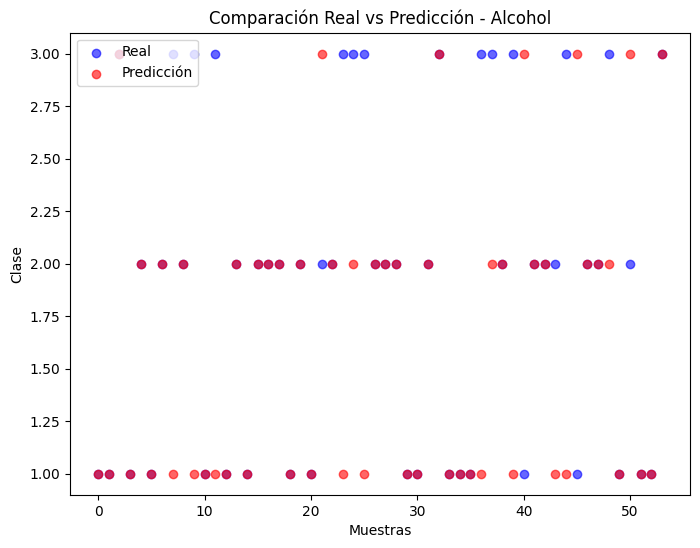

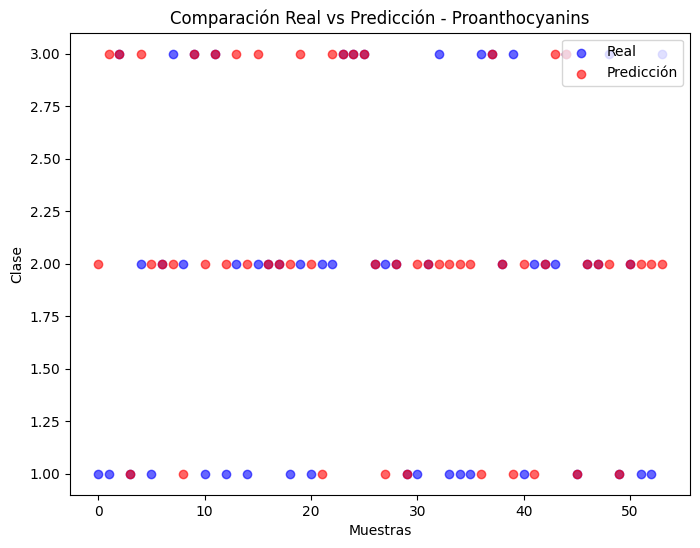

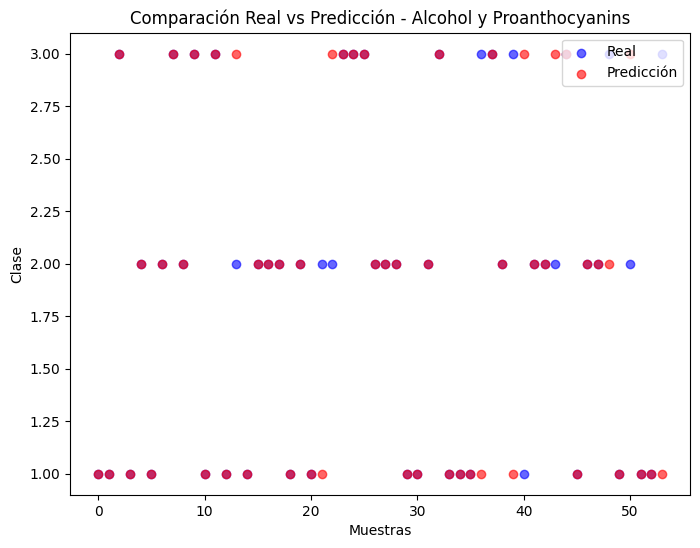

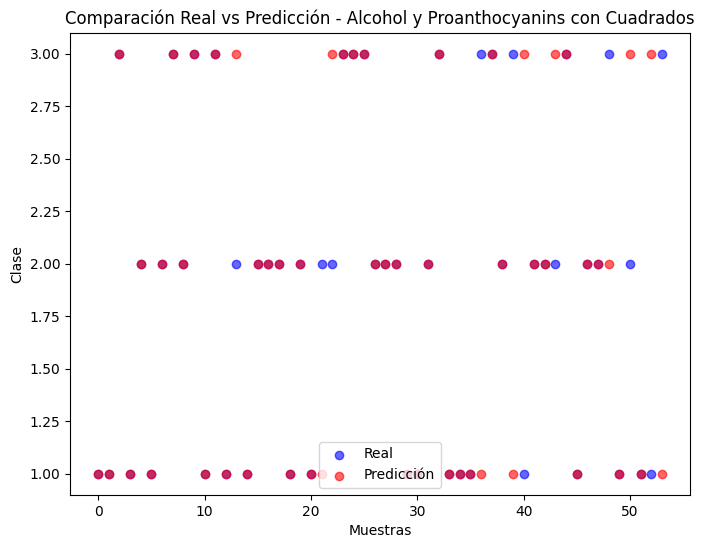

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Paso 1: Cargar los datos
column_names = [
    'Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols',
    'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue',
    'OD280/OD315_of_diluted_wines', 'Proline'
]
wine_data = pd.read_csv('/content/wine.data', header=None, names=column_names)

# Paso 2: Seleccionar características
# Característica relevante: Alcohol
# Característica no relevante: Proanthocyanins
X_relevant = wine_data[['Alcohol']].values
X_not_relevant = wine_data[['Proanthocyanins']].values
y = wine_data['Class'].values

# Dividir en conjuntos de entrenamiento y prueba
X_train_rel, X_test_rel, y_train, y_test = train_test_split(X_relevant, y, test_size=0.3, random_state=42)
X_train_not_rel, X_test_not_rel, _, _ = train_test_split(X_not_relevant, y, test_size=0.3, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_rel = scaler.fit_transform(X_train_rel)
X_test_rel = scaler.transform(X_test_rel)
X_train_not_rel = scaler.fit_transform(X_train_not_rel)
X_test_not_rel = scaler.transform(X_test_not_rel)

# Paso 3: Entrenar el modelo con diferentes combinaciones

# Modelo 1: Usar una característica relevante
model_rel = LogisticRegression(max_iter=100)
model_rel.fit(X_train_rel, y_train)
y_pred_rel = model_rel.predict(X_test_rel)

# Modelo 2: Usar una característica no relevante
model_not_rel = LogisticRegression(max_iter=100)
model_not_rel.fit(X_train_not_rel, y_train)
y_pred_not_rel = model_not_rel.predict(X_test_not_rel)

# Modelo 3: Usar ambas características
X_both = np.hstack((X_relevant, X_not_relevant))
X_train_both, X_test_both, _, _ = train_test_split(X_both, y, test_size=0.3, random_state=42)

X_train_both = scaler.fit_transform(X_train_both)
X_test_both = scaler.transform(X_test_both)

model_both = LogisticRegression(max_iter=100)
model_both.fit(X_train_both, y_train)
y_pred_both = model_both.predict(X_test_both)

# Modelo 4: Usar ambas características y sus cuadrados
X_both_squared = np.hstack((X_both, X_both**2))
X_train_both_sq, X_test_both_sq, _, _ = train_test_split(X_both_squared, y, test_size=0.3, random_state=42)

X_train_both_sq = scaler.fit_transform(X_train_both_sq)
X_test_both_sq = scaler.transform(X_test_both_sq)

model_both_sq = LogisticRegression(max_iter=100)
model_both_sq.fit(X_train_both_sq, y_train)
y_pred_both_sq = model_both_sq.predict(X_test_both_sq)

# Paso 4: Generar matrices de confusión
cm_rel = confusion_matrix(y_test, y_pred_rel)
cm_not_rel = confusion_matrix(y_test, y_pred_not_rel)
cm_both = confusion_matrix(y_test, y_pred_both)
cm_both_sq = confusion_matrix(y_test, y_pred_both_sq)

# Imprimir los resultados
print("Matriz de confusión - Característica relevante (Alcohol):")
print(cm_rel)
print("\nMatriz de confusión - Característica no relevante (Proanthocyanins):")
print(cm_not_rel)
print("\nMatriz de confusión - Ambas características (Alcohol y Proanthocyanins):")
print(cm_both)
print("\nMatriz de confusión - Ambas características y sus cuadrados:")
print(cm_both_sq)

# Calcular el f1-score para cada modelo
f1_rel = f1_score(y_test, y_pred_rel, average='weighted')
f1_not_rel = f1_score(y_test, y_pred_not_rel, average='weighted')
f1_both = f1_score(y_test, y_pred_both, average='weighted')
f1_both_sq = f1_score(y_test, y_pred_both_sq, average='weighted')

print("\nF1-score - Característica relevante (Alcohol):", f1_rel)
print("F1-score - Característica no relevante (Proanthocyanins):", f1_not_rel)
print("F1-score - Ambas características (Alcohol y Proanthocyanins):", f1_both)
print("F1-score - Ambas características y sus cuadrados:", f1_both_sq)

# Graficos
# Definir una función para generar las gráficas de comparación
def plot_comparison(y_test, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(y_test)), y_test, color='blue', label='Real', alpha=0.6)
    plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicción', alpha=0.6)
    plt.title(title)
    plt.xlabel('Muestras')
    plt.ylabel('Clase')
    plt.legend()
    plt.show()

# Generar gráficas de comparación para cada modelo

# Modelo 1: Característica relevante (Alcohol)
plot_comparison(y_test, y_pred_rel, "Comparación Real vs Predicción - Alcohol")

# Modelo 2: Característica no relevante (Proanthocyanins)
plot_comparison(y_test, y_pred_not_rel, "Comparación Real vs Predicción - Proanthocyanins")

# Modelo 3: Ambas características (Alcohol y Proanthocyanins)
plot_comparison(y_test, y_pred_both, "Comparación Real vs Predicción - Alcohol y Proanthocyanins")

# Modelo 4: Ambas características y sus cuadrados
plot_comparison(y_test, y_pred_both_sq, "Comparación Real vs Predicción - Alcohol y Proanthocyanins con Cuadrados")


# Paso 5: Evaluar la utilidad del modelo en este contexto de clasificación
# Según los resultados, el modelo con ambas características (Alcohol y Proanthocyanins) parece ser el más robusto
# Agregar términos cuadráticos no muestra una mejora significativa.


In [ ]:
%%shell
jupyter nbconvert --to html /content/Port_Imple_WFRAMEWORK_A01571214_Lautaro_Coteja.ipynb

[NbConvertApp] Converting notebook /content/Port_Imple_WFRAMEWORK_A01571214_Lautaro_Coteja.ipynb to html
[NbConvertApp] Writing 744477 bytes to /content/Port_Imple_WFRAMEWORK_A01571214_Lautaro_Coteja.html
